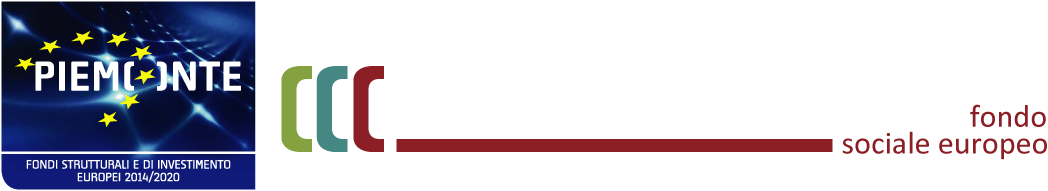





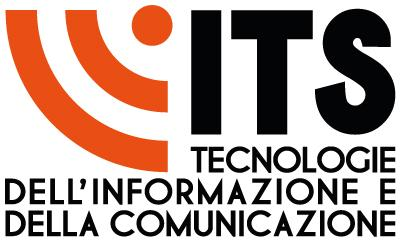




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** inferenza e calcolo delle probablità

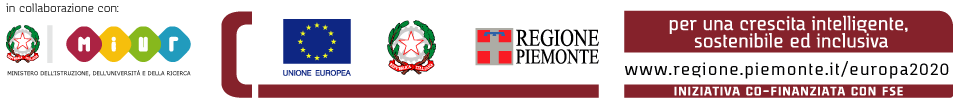



---


# **Inferenza e Probabilità**


---



Dopo aver descritto i dati attraverso le informazioni ottenute a partire dai suoi indici di posizione, si vuole ora generalizzare i risultati ottenuti creando un "modello idealizzato". In altre parole, si vuole ottenere una sintesi compatta di ciò che descrivono i dati a prescindere da irregolarità e outlier trascurabili (sopreattutto in caso di dataset molto grandi).

Cercando un punto di partenza da cui cominciare la costruzione del modello, immediatamente viene in mente che, in un certo senso, la deviazione standard crea una sorta di zona ben delimitiata con al centro la media.







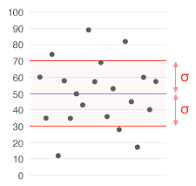

Da questa osservazione in poi, ci verrà in aiuto la **distribuzione normale**,  una distribuzione di probalità costruita sul modo in cui un fenomeno statistico si comporta attorno alla media.



---


# **La distribuzione normale**


---



Chiamata anche con il termine di ***gaussiana*** (dal nome del matematcio che la scopri), "comprime" i valori di un insieme di dati all'interno di una curva dalla forma a campana, la cui descrizione è strettamente determina dalla media e dalla deviazione standard.

Caratteristiche:
* è una curva simmetrica e l'asse centrale corrisponde alla media
* il range di valori possibili tende a 0 o a d 1 in base alla distanza dalla media.
* la somma dei valori o anche l'area sottesa al grafico, sono uguali ad 1
* la forma (*curtosi*) è determinata dalla deviazione standard:
  * *leptocurtica* (ipernormale): la campana è piuttosto schiacciata verso la media. Si è in presenza di una bassa deviazione standard
  * *mesocurtica* (normale): la campana ha una forma regolare e tale è anche la deviazione standard.
  * *platicurtica*: la campana è shiacciata verso il basso. Indica che i valori sono molti dispersi e lontani rispetto alla media con una deviazione standard alta. 


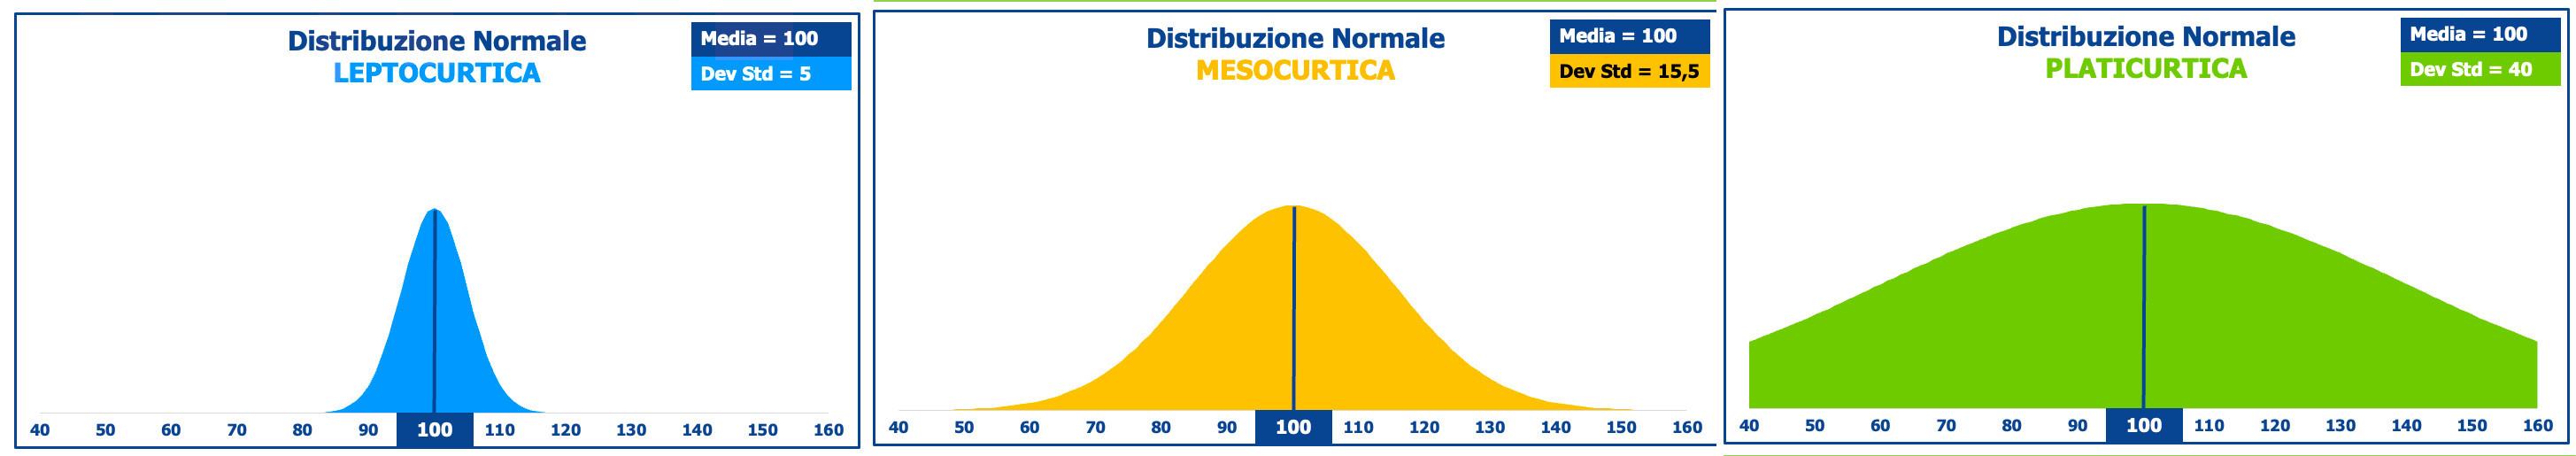

*fonte immagine: https://adrianogilardone.com/distribuzione-normale/*






---



\begin{align}
  f(x\mu, σ)  =  {{1 \over{\sigma \sqrt{2 \pi}}} e^{- (x- \mu)^2 \over 2\sigma^2}} 
\end{align}

\begin{align}
&\sigma = deviazione \  standard \\
&\mu = media
\end{align}

**Regola empirica 68-95-99 (dei tre sigma)**

Si tratta di una sorta di "convenzione" che vuole generalizzare la distribuzione dei dati all'interno di un range di intervalli.
Nello specifico indica che in generale il 68%, 95% e 99,7% dei valori,  si trovano rispettivamente all'inteno di una, due, tre devizioni standard dalla media (vedere z-score).

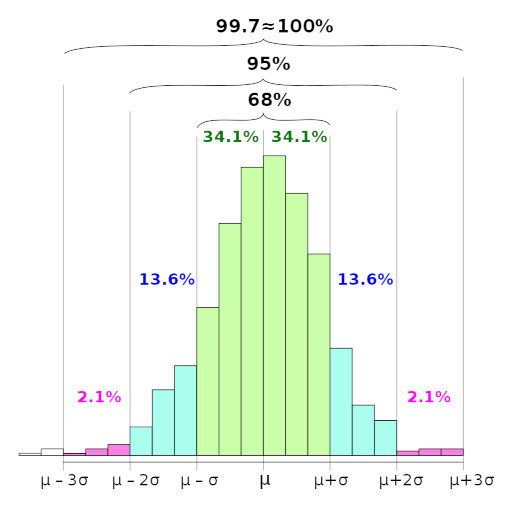



---



\
**python**

In [2]:
import numpy as np
import math


def distribuzione_normale(x: np.array, m: float, ds: float) -> float:
  num =  (np.exp( -np.power(x - m, 2) / (2 * ds**2) )) 
  den =  ( math.sqrt(math.pi * 2) * ds)
  return num / den


**visualizzazione**

In [18]:
import matplotlib.pyplot as plt


data = np.array([8,   4,  4, 14,  8, 14, 10, 14, 14,  4, 10, 10, 16, 18,  6,  8, 10,  8, 14, 12])
mu = np.mean(data)
sigma =  np.std(data)


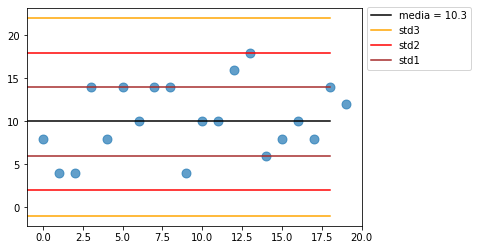

In [48]:
dsx = np.arange(-1, data.size -1)

# tracciato media
plt.plot(dsx, np.full_like(data, mu), color="black", label= 'media = ' + str(mu))

# tracciato deviazione standard
plt.plot(dsx, np.full_like(data, mu - (sigma * 3)), color="orange", label="std3")
plt.plot(dsx, np.full_like(data, mu - (sigma * 2)), color="red",    label="std2")
plt.plot(dsx, np.full_like(data, mu - sigma),       color="brown",  label="std1")
plt.plot(dsx, np.full_like(data, mu + sigma),       color="brown")
plt.plot(dsx, np.full_like(data, mu + (sigma * 2)), color="red")
plt.plot(dsx, np.full_like(data, mu + (sigma * 3)), color="orange")

# data
plt.scatter(np.arange(data.size), data, s=80, alpha = 0.7)


plt.legend(bbox_to_anchor=(1., 1.03))   
plt.xlim(xmin=-1)    
plt.show()

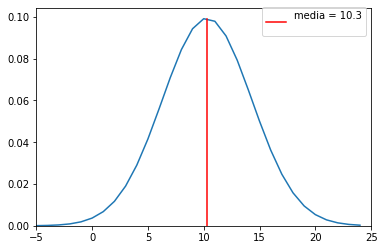

In [53]:
x = np.arange(-5, 25)
y = distribuzione_normale(x, mu, sigma)

plt.plot(x, y)
# tracciato media
plt.plot(np.linspace(mu,mu, num=x.size), 
         np.linspace(0,np.max(y), num=y.size),
         color='red',  
         label= 'media = ' + str(mu) + "\n")
plt.legend(bbox_to_anchor=(1., 1.03))   
plt.ylim(ymin=0)
plt.xlim(-5, 25)
plt.show()




**La distribuzione normale in NumPy**

La funzione all'interno della libreria NumPy genera un range di numeri casuali usando la distribuzione normale. La concentrazione sarà per la maggior parte contenuta all'interno delle tre deviazioni standard salvo qualche outlier

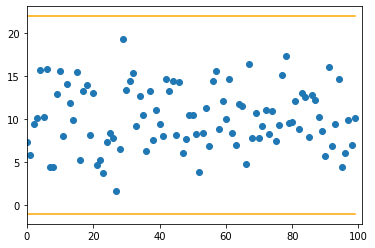

In [64]:
cmax = 100
cx = np.arange(cmax)
cy = np.random.normal(mu, sigma, cmax)

plt.scatter(cx, cy)
plt.plot(cx, np.full_like(cx, mu - (sigma * 3)), color="orange", label="std3")
plt.plot(cx, np.full_like(cx, mu + (sigma * 3)), color="orange")
plt.xlim(0,cmax+1)
plt.show()